In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv("./Pokemon.csv")

In [2]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
data[data["Legendary"]].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
Type12 = pd.get_dummies(data["Type 1"])+pd.get_dummies(data["Type 2"])

In [6]:
data.drop(columns=["#", "Name"], inplace=True)

In [7]:
data.Legendary = data.Legendary.astype(int)

<Figure size 1008x864 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]), <a list of 27 Text xticklabel objects>)

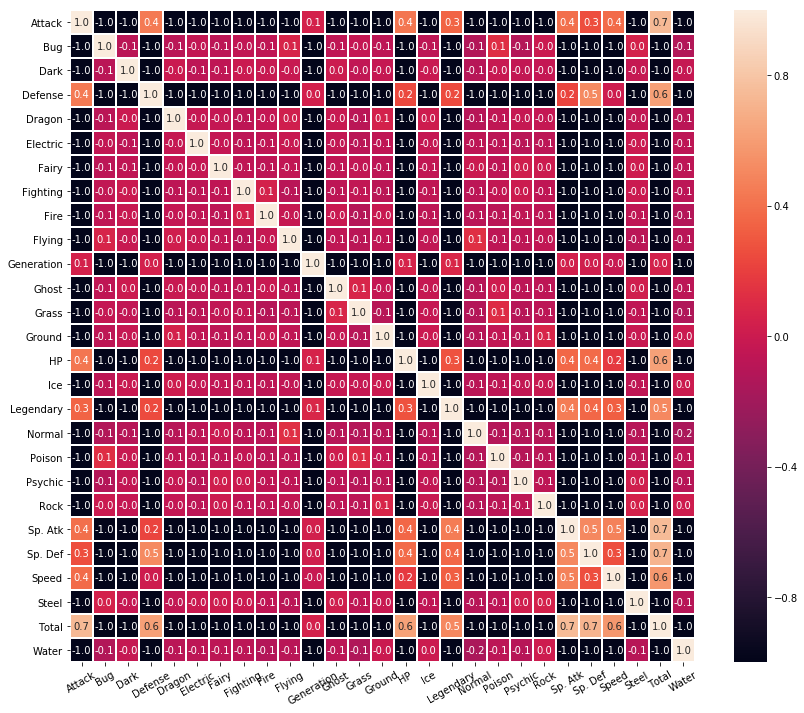

In [8]:
%matplotlib inline
import seaborn as sns

sns.set_style()

plt.figure(figsize=(14, 12))
sns.heatmap(
    pd.concat([data.drop(columns=["Type 1", "Type 2"]),
               Type12]).corr().fillna(-1),
    annot=True,
    fmt=".1f",
    linewidths=1)
plt.xticks(rotation=30)
plt.show()

In [9]:
pd.concat([data.drop(columns=["Type 1", "Type 2"]), Type12]).corr()

,Attack,Bug,Dark,Defense,Dragon,Electric,Fairy,Fighting,Fire,Flying,...,Normal,Poison,Psychic,Rock,Sp. Atk,Sp. Def,Speed,Steel,Total,Water
Attack,1.000000,NaN,NaN,0.438687,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.396362,0.263990,0.381240,NaN,0.736211,NaN
Bug,NaN,1.000000,-0.082062,NaN,-0.081200,-0.045111,-0.072148,-0.048645,-0.060536,0.064571,...,-0.120219,0.121210,-0.111968,-0.003706,NaN,NaN,NaN,0.047178,NaN,-0.123983
Dark,NaN,-0.082062,1.000000,NaN,-0.003963,-0.067375,-0.059864,-0.007791,-0.020368,-0.022164,...,-0.099751,-0.018227,-0.044327,-0.033493,NaN,NaN,NaN,-0.023978,NaN,-0.028548
Defense,0.438687,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.223549,0.510747,0.015227,NaN,0.612787,NaN
Dragon,NaN,-0.081200,-0.003963,NaN,1.000000,-0.024000,-0.035541,-0.068775,-0.038069,0.026237,...,-0.098702,-0.055525,-0.026557,-0.032360,NaN,NaN,NaN,-0.044417,NaN,-0.083285
Electric,NaN,-0.045111,-0.067375,NaN,-0.024000,1.000000,-0.035541,-0.068775,-0.057104,-0.020407,...,-0.067737,-0.074838,-0.091928,-0.072188,NaN,NaN,NaN,-0.001346,NaN,-0.069109
Fairy,NaN,-0.072148,-0.059864,NaN,-0.035541,-0.035541,1.000000,-0.061108,-0.067651,-0.052669,...,-0.001720,-0.066495,0.027227,0.002212,NaN,NaN,NaN,0.013155,NaN,-0.067703
Fighting,NaN,-0.048645,-0.007791,NaN,-0.068775,-0.068775,-0.061108,1.000000,0.051130,-0.086119,...,-0.071687,-0.039613,0.000596,-0.055090,NaN,NaN,NaN,-0.005161,NaN,-0.073778
Fire,NaN,-0.060536,-0.020368,NaN,-0.038069,-0.057104,-0.067651,0.051130,1.000000,-0.028855,...,-0.085097,-0.085471,-0.061243,-0.064677,NaN,NaN,NaN,-0.056108,NaN,-0.114850
Flying,NaN,0.064571,-0.022164,NaN,0.026237,-0.020407,-0.052669,-0.086119,-0.028855,1.000000,...,0.125506,-0.067950,-0.063872,-0.048221,NaN,NaN,NaN,-0.081400,NaN,-0.092030


limit_output extension: Maximum message size of 10000 exceeded with 14479 characters

<Figure size 576x864 with 0 Axes>

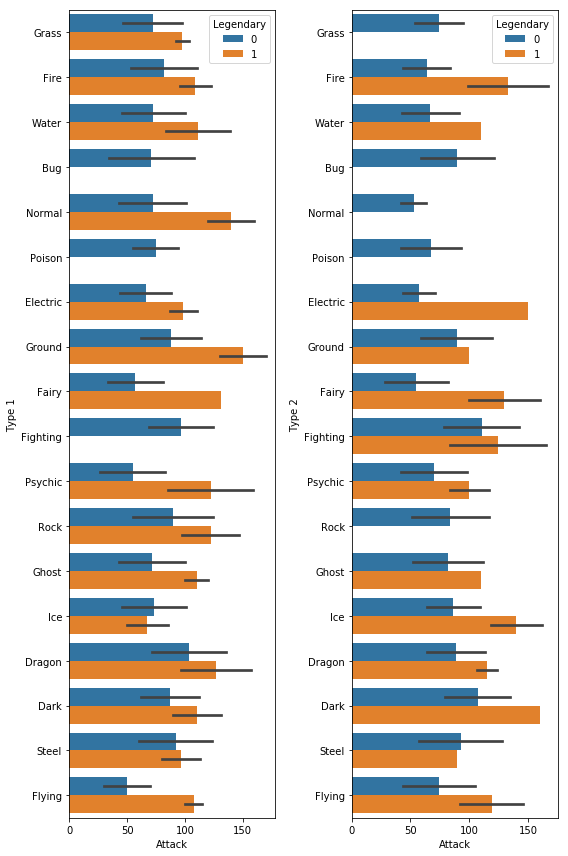

In [10]:
plt.figure(figsize=(8, 12))
plt.subplot(121)
sns.barplot(
    y='Type 1',
    x='Attack',
    data=data,
    hue='Legendary',
    order=data["Type 1"].unique(),
    ci="sd")

plt.subplot(122)
sns.barplot(
    y='Type 2',
    x='Attack',
    data=data,
    hue='Legendary',
    order=data["Type 1"].unique(),
    ci="sd")

plt.tight_layout()

<Figure size 576x864 with 0 Axes>

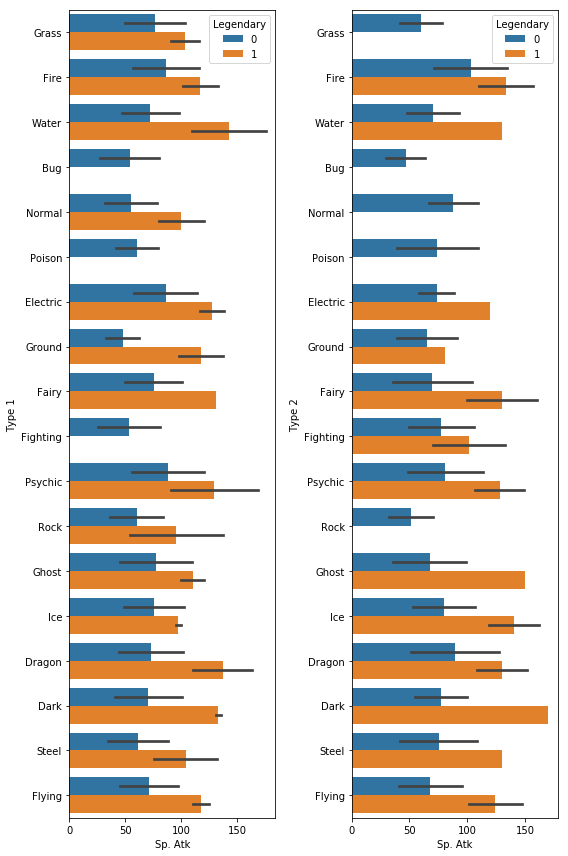

In [11]:
plt.figure(figsize=(8, 12))
plt.subplot(121)
sns.barplot(
    y='Type 1',
    x='Sp. Atk',
    data=data,
    hue='Legendary',
    order=data["Type 1"].unique(),
    ci="sd")

plt.subplot(122)
sns.barplot(
    y='Type 2',
    x='Sp. Atk',
    data=data,
    hue='Legendary',
    order=data["Type 1"].unique(),
    ci="sd")

plt.tight_layout()

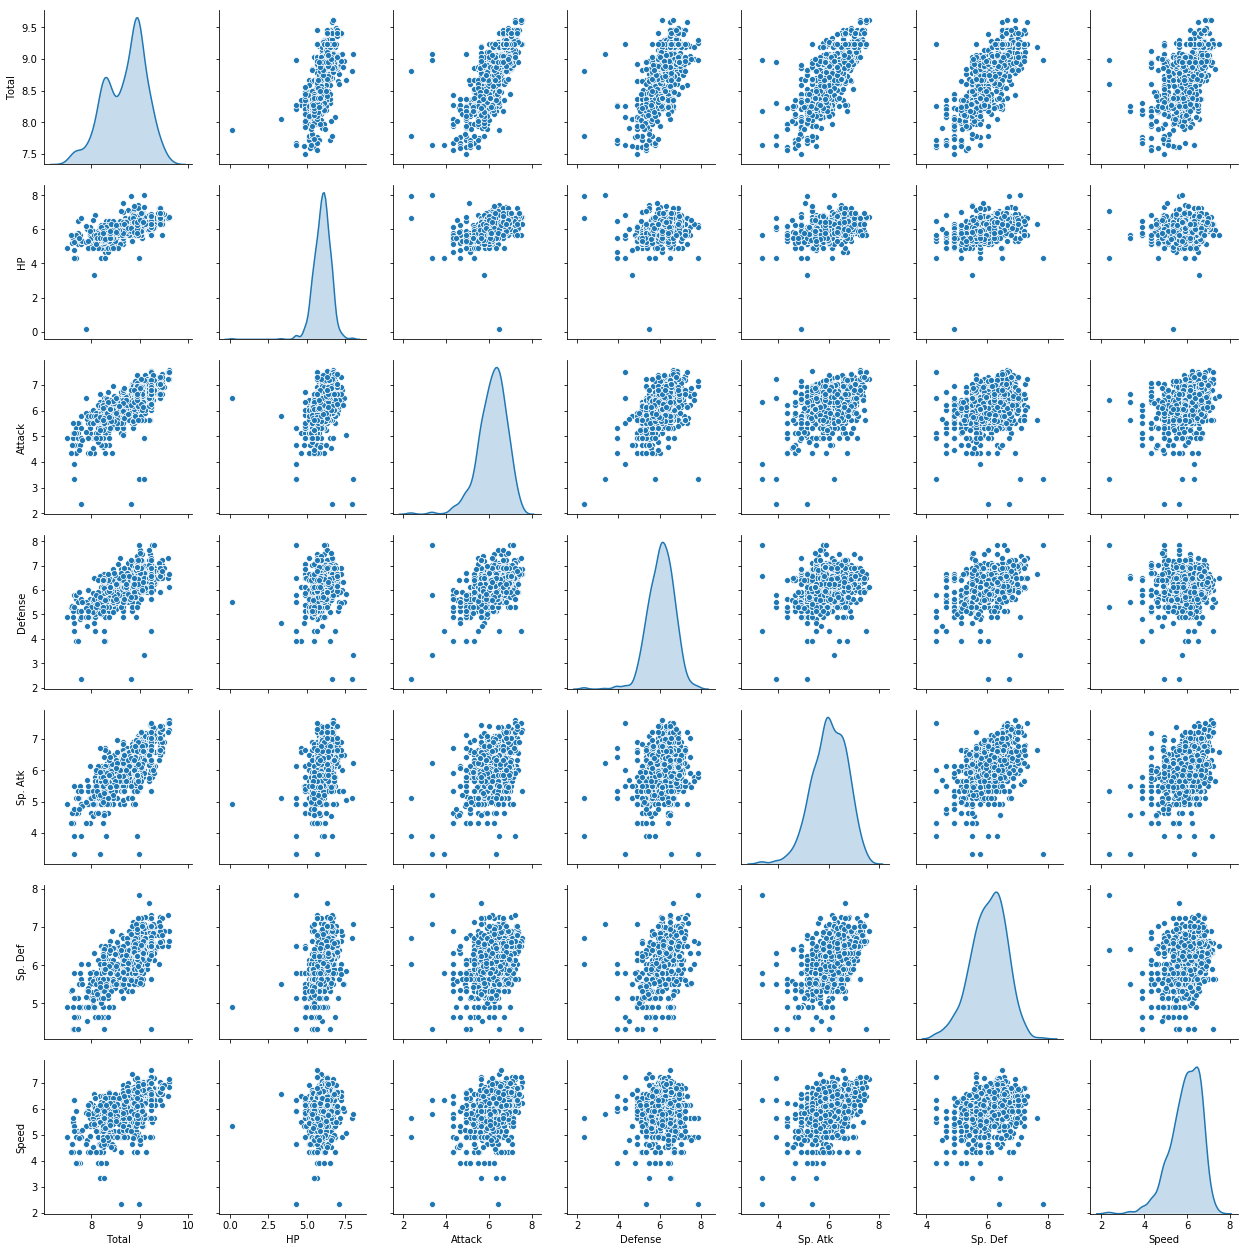

In [12]:
sns.pairplot(
    data[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def",
          "Speed"]].apply(lambda x: np.log2(x + 0.1)), diag_kind='kde')

In [31]:
plotdata = data.copy()
plotdata["Defense"] = plotdata["Defense"].apply(lambda x: np.log10(x+0.1))
plotdata["Attack"] = plotdata["Attack"].apply(lambda x: np.log10(x+0.1))

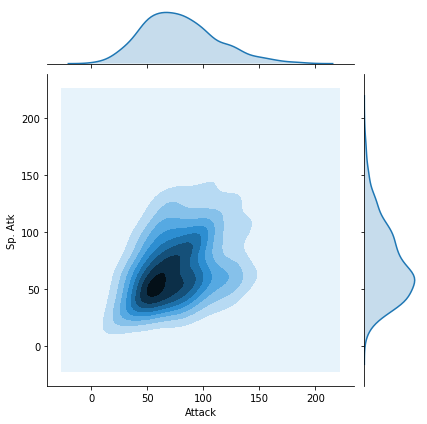

In [13]:
sns.jointplot(x='Attack', 
              y='Sp. Atk', 
              data=data, 
              kind='kde')

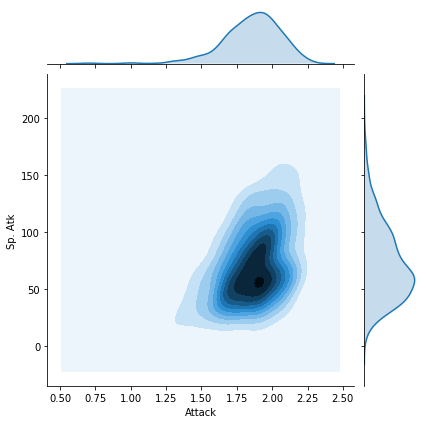

In [34]:
sns.jointplot(x='Attack', 
              y='Sp. Atk', 
              data=plotdata, 
              kind='kde')

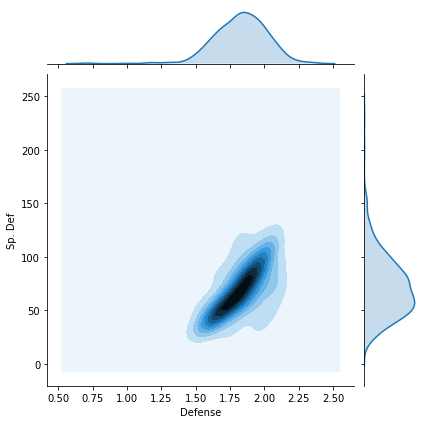

In [29]:
sns.jointplot(
    x='Defense',
    y='Sp. Def',
    data=plotdata,
    kind='kde')

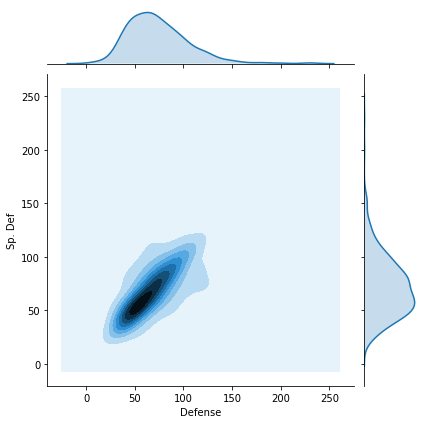

In [15]:
sns.jointplot(
    x='Defense',
    y='Sp. Def',
    data=data,
    kind='kde')

<Figure size 432x720 with 0 Axes>

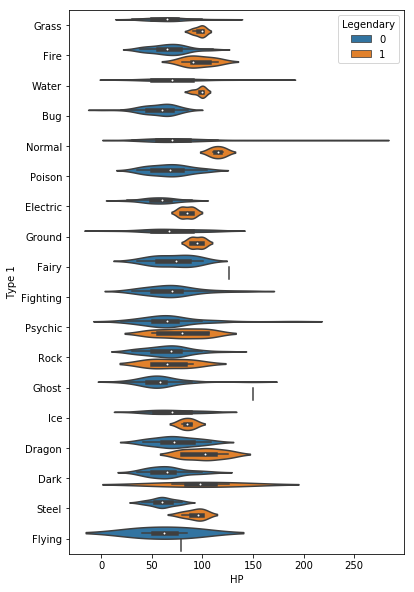

In [72]:
plt.figure(figsize=(6, 10))
sns.violinplot(x='Total', 
               y='Type 1',
               hue='Legendary',
               data=data,
               order=data["Type 1"].unique())

<Figure size 432x720 with 0 Axes>

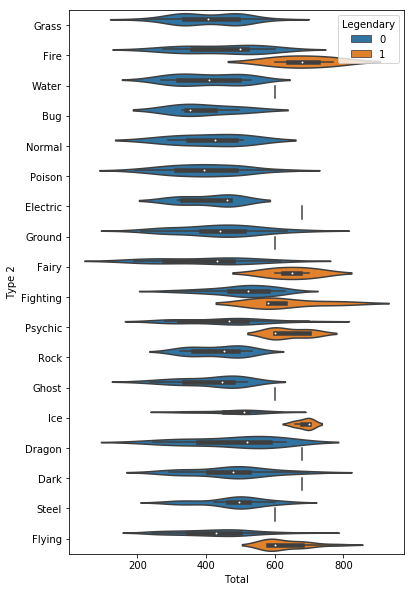

In [73]:
plt.figure(figsize=(6, 10))
sns.violinplot(x='Total', 
               y='Type 2',
               hue='Legendary',
               data=data,
               order=data["Type 1"].unique())

In [16]:
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = data.HP
new_data = data.copy()
new_data[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def",
      "Speed"]] = data[[
          "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"
      ]].apply(lambda x: np.log2(x + 0.1))

X = pd.concat([new_data.drop(columns=["HP", "Type 1", "Type 2"]), Type12], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

0.7193264180708873

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))

185.29034193442706